In [55]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import numpy as np
import numpy as np
from scipy import stats
from scipy.stats import norm
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))
from pandas.plotting import scatter_matrix
import pandas as pd

Python: 3.6.4 (v3.6.4:d48eceb, Dec 19 2017, 06:54:40) [MSC v.1900 64 bit (AMD64)]
scipy: 1.4.1
numpy: 1.18.5
matplotlib: 3.3.3
pandas: 1.1.2
sklearn: 0.24.0


In [56]:
import pandas as pd
df = pd.read_csv ("D:/ML/datagpx.csv", sep=',')
df.head()




C:\Users\sanja\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
0,29-12-2021,2.585,2.89,2.83,2.83,2.65,2.65,2.71,26285.0,71322.28,22.0
1,28-12-2021,2.695,2.70,2.87,2.87,2.70,2.70,2.73,58591.0,160202.71,24.0
2,27-12-2021,2.740,2.94,2.96,2.96,2.76,2.76,2.83,29518.0,83402.04,30.0
3,23-12-2021,2.965,3.10,3.30,3.30,2.96,2.96,3.12,900.0,2808.25,4.0
4,22-12-2021,3.000,3.27,2.86,3.00,2.80,3.00,2.85,71301.0,203193.29,14.0


In [57]:
df.dtypes



Date              object
Bid              float64
Ask              float64
Opening price    float64
High price       float64
Low price        float64
Closing price    float64
Average price    float64
Total volume     float64
Turnover         float64
Trades           float64
dtype: object

In [58]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')
df.set_index(['Date'], inplace=True)


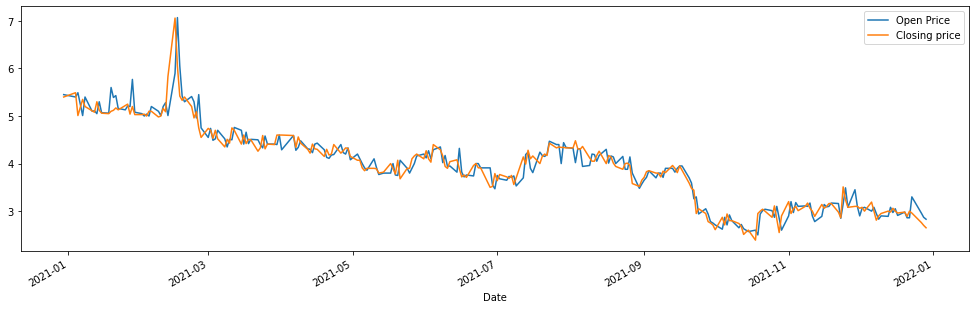

In [59]:
df['Opening price'].plot(label = 'Open Price',figsize = (17,5))
df['Closing price'].plot(label = 'Closing price',figsize = (17,5))
plt.legend()
plt.show()

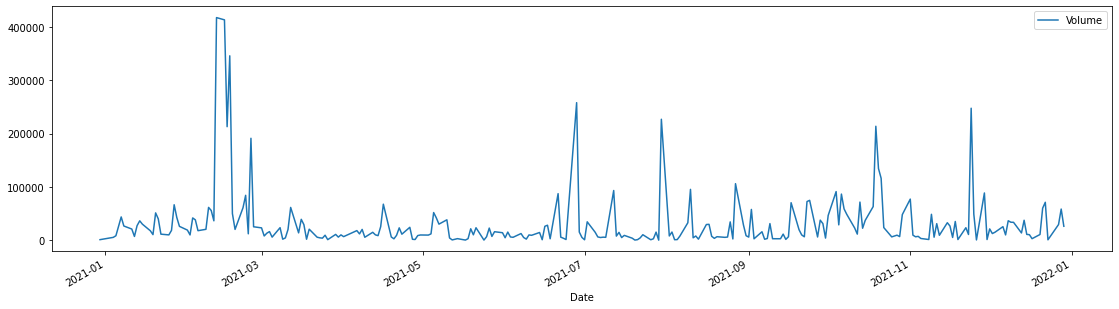

In [60]:
df['Total volume'].plot(label = 'Volume',figsize = (19,5))
plt.legend()
plt.show()

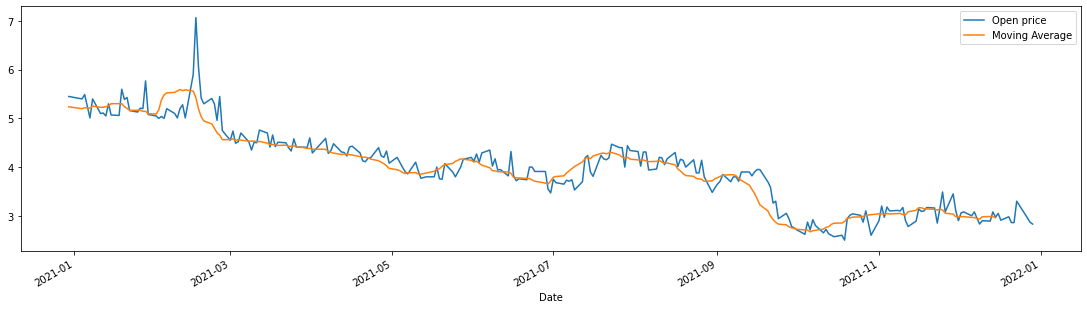

In [61]:
df['Opening price'].plot(label = 'Open price',figsize = (19,5))
df['Moving Average 10'] = df['Opening price'].rolling(10).mean()
df['Moving Average 10'].plot(label = 'Moving Average',figsize = (19,5))
plt.legend()

<AxesSubplot:xlabel='Date'>

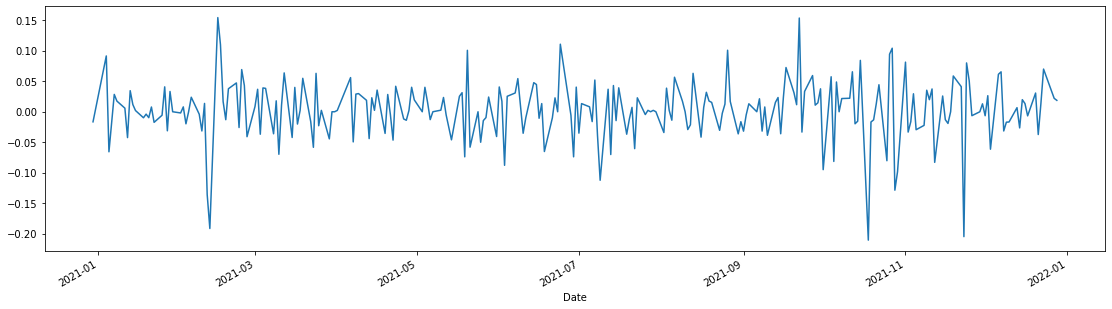

In [70]:

gpx_close = df['Closing price']
#df.apply (pd.to_numeric, errors='coerce')
gpx_close =gpx_close.dropna()
gpx_return = np.log(gpx_close).diff()
gpx_return.plot(label = 'Rate of return',figsize = (19,5))




In [71]:
print(gpx_close)

Date
2021-12-29    2.65
2021-12-28    2.70
2021-12-27    2.76
2021-12-23    2.96
2021-12-22    3.00
              ... 
2021-01-08    5.20
2021-01-07    5.35
2021-01-05    5.01
2021-01-04    5.49
2020-12-30    5.40
Name: Closing price, Length: 253, dtype: float64


In [73]:
gpx_return.dropna(inplace = True)
gpx_return.describe()
n, minmax, mean, var, skew, kurt = stats.describe(gpx_return)
mini, maxi = minmax
std = var **.5

In [74]:
stats.describe(gpx_return)

DescribeResult(nobs=252, minmax=(-0.21051180440830908, 0.15438677946240054), mean=0.002824759180841659, variance=0.0023720125739833623, skewness=-0.7603522577471054, kurtosis=3.457912392274891)

(array([ 3.,  0.,  0.,  2.,  3., 10., 15., 40., 63., 57., 35., 14.,  6.,
         2.,  2.]),
 array([-0.2105118 , -0.18618523, -0.16185866, -0.13753209, -0.11320552,
        -0.08887894, -0.06455237, -0.0402258 , -0.01589923,  0.00842735,
         0.03275392,  0.05708049,  0.08140706,  0.10573363,  0.13006021,
         0.15438678]),
 <BarContainer object of 15 artists>)

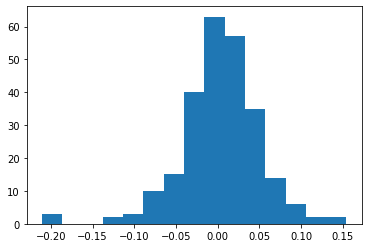

In [75]:
plt.hist(gpx_return,bins = 15)

(array([ 9.,  7., 17., 24., 26., 30., 30., 32., 35., 20., 11.,  5.,  4.,
         1.,  1.]),
 array([-0.10781811, -0.0909331 , -0.07404809, -0.05716309, -0.04027808,
        -0.02339307, -0.00650806,  0.01037694,  0.02726195,  0.04414696,
         0.06103197,  0.07791697,  0.09480198,  0.11168699,  0.128572  ,
         0.145457  ]),
 <BarContainer object of 15 artists>)

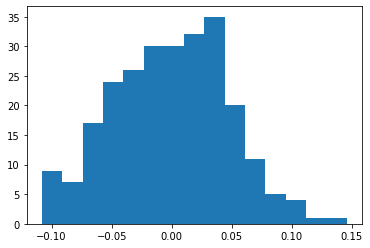

In [76]:
x = norm.rvs(mean,std,n)
plt.hist(x, bins= 15)

In [77]:
x_test = stats.kurtosistest(x)
gpx_test = stats.kurtosistest(gpx_return)
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"GPX: {gpx_test[0]:13.2f}{gpx_test[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:            -0.96          0.3377
GPX:          5.11          0.0000


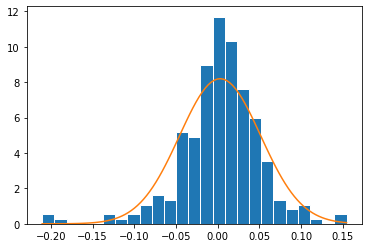

In [35]:
plt.hist(gpx_return, bins = 25, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, norm.pdf(data, mean, std));

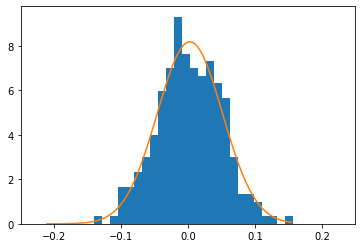

In [36]:
plt.hist(x, bins =25, density = True)
b = np.linspace(mini, maxi, 100)
plt.plot(b,stats.norm.pdf(b, mean, std))
plt.xlim(-0.25,0.25);

In [78]:

import pandas_datareader as pdr

import pandas as pd

In [79]:
scaler = MinMaxScaler(feature_range=(0,1))

In [80]:
scaled_data = scaler.fit_transform(gpx_close.values.reshape(-1,1))
prediction_days =60

In [81]:
scaled_data

array([[0.05567452],
       [0.06638116],
       [0.07922912],
       [0.12205567],
       [0.13062099],
       [0.10706638],
       [0.12633833],
       [0.12205567],
       [0.13062099],
       [0.14346895],
       [0.12633833],
       [0.13062099],
       [0.11991435],
       [0.10920771],
       [0.08993576],
       [0.13062099],
       [0.17130621],
       [0.13062099],
       [0.14775161],
       [0.14346895],
       [0.15203426],
       [0.15203426],
       [0.14775161],
       [0.18201285],
       [0.23982869],
       [0.1006424 ],
       [0.12633833],
       [0.16488223],
       [0.16488223],
       [0.15203426],
       [0.14346895],
       [0.16059957],
       [0.10706638],
       [0.13062099],
       [0.14346895],
       [0.16702355],
       [0.15203426],
       [0.13276231],
       [0.15203426],
       [0.14132762],
       [0.11991435],
       [0.17344754],
       [0.10920771],
       [0.03426124],
       [0.09421842],
       [0.15417559],
       [0.10278373],
       [0.130

In [82]:
x_train =[]
y_train =[]

In [83]:
for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])


In [84]:
x_train,y_train =np.array(x_train),np.array(y_train)
x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape




(193, 60, 1)

In [85]:
model =Sequential()

model.add(LSTM(units =50, return_sequences=True, input_shape= (x_train.shape[1],1)))


model.add(LSTM(units =50, return_sequences=False))


model.add(Dense(units =25))
model.add(Dense(units =1))




model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train, epochs=2, batch_size=5)




Epoch 1/2
39/39 [==============================] - 4s 35ms/step - loss: 0.0159
Epoch 2/2
39/39 [==============================] - 1s 36ms/step - loss: 0.0046


In [37]:
df3.tail()



248    08-01-2021
249    07-01-2021
250    05-01-2021
251    04-01-2021
252    30-12-2020
Name: Date, dtype: object

In [1]:
print(HTML)


NameError: name 'HTML' is not defined